### Problem 1.

In [2]:
import numpy as np

In [3]:
def num_integrate(func, a, b, N, method='midpoint'):
    
    x_vals = np.linspace(a, b, num=N)
    ii = np.arange(len(x_vals))
    
    if method == 'tapezoid':
        xi_vals = a + (ii*(b - a))/N
        g_vals = np.sum(func(xi_vals)) + func(xi_vals[-1])
        w = (b - a)/(2*N)
        
        result_trap = w * (func(xi_vals[0]) + 2 * g_vals)
        return result_trap
    
    elif method == 'Simpsons':

            h = (b - a) / N
            s = func(a) + func(b)

            for i in range(1, N, 2):
                s += 4 * func(a + i * h)
            for i in range(2, N-1, 2):
                s += 2 * func(a + i * h)

            return s * h / 3
    
    elif method == 'midpoint':
        xi_vals = a + (((2*ii+1)*(b - a))/(2*N))
        g_vals = func(xi_vals)
        w = (b - a)/N
        
        result_mid = w * np.sum(g_vals[:-1])
        return result_mid


In [4]:
g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
a = -10
b = 10
N = 10000

import sympy as sy
z = sy.symbols('z')
sy.integrate(0.1*z**4 - 1.5*z**3 + 0.53*z**2 + 2*z + 1, (z, a, b))

4373.33333333333

In [5]:
num_integrate(g, a, b, N, method='midpoint')

4374.1851216356135

In [6]:
num_integrate(g, a, b, N, method='tapezoid')

4377.9757567908655

In [7]:
num_integrate(g, a, b, N, method='Simpsons')
# cearly there is something wrong here

4373.333333333318

### Problem 2.

In [8]:
from scipy.stats import norm
import matplotlib.pyplot as plt

In [9]:
def approx_normal(mu, sigma, N, k):
    # preparation
    upper = mu-k*sigma
    lower = mu + k*sigma
    x_vals = np.linspace(upper, lower, N)
    step_size = np.diff(x_vals)[0]
    
    func = lambda x: norm.cdf(x, loc=mu, scale=sigma)
    func(x_vals)
    
    a = x_vals - 0.5 * step_size 
    b= x_vals + 0.5 *step_size
    w = func(b) - func(a)
    
    return w, x_vals       

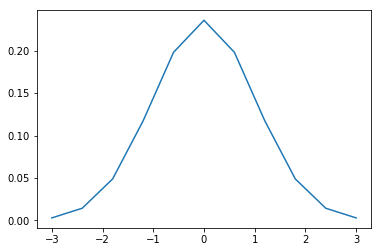

weights: [ 0.00298355  0.01439745  0.04894278  0.11725292  0.19802845  0.23582284
  0.19802845  0.11725292  0.04894278  0.01439745  0.00298355] nodes: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [10]:
w, z = approx_normal(0.0, 1.0, 11, 3)
plt.plot(z, w)
plt.show()
print('weights:',w,'nodes:', z)

### Probem 3.
#### approximate log normal dist

Do $A$ and $Z$ from the expercise really hav the same expected value and variance?!?!?!

In [11]:
def approx_lognorm(mu_n, sigma_n, N, k):
    
    wn, zn = approx_normal(mu_n, sigma_n, N, k)
    
    return wn, np.exp(zn)

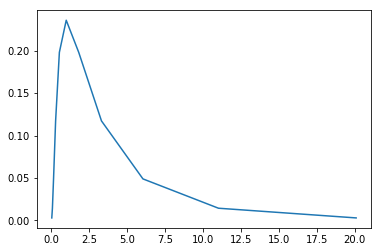

In [12]:
w, z = approx_lognorm(0.0, 1.0, 11, 3)
plt.plot(z, w)
plt.show()

### Problem 4.
#### compare expected values

In [13]:
w, y = approx_lognorm(10.5, 0.8, 57, 4)

EY = w @ y
EY

50011.380463843656

In [14]:
np.exp(10.5 +(0.8**2)/2)

50011.087008521754

### Problem 5.

### Problem 6.
#### integration using scipy

In [15]:
import scipy as sc

g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1

In [16]:
sc.integrate.quad(g, -10, 10)

(4373.333333333334, 8.109531705284936e-11)

### Ptoblem 7.
Approximate $\pi$ using Monte Carlo Integration

In [17]:
def g(x_var):
    x, y = x_var
    val = (x**2 + y**2) <= 1
    return val.astype(int)

In [18]:
domain = np.array([[-1, 1], [-1, 1]])
N = 100

def mc_int(g, domain_x, N):
    
    V = np.prod(np.diff(domain, axis=1))
    num_vars = len(domain_x)
    g_vec = np.empty(N)
    new_x = np.random.uniform(size=(num_vars, N))
    g_vec = g(new_x)
    
    integral = g_vec.sum() * (V/N)
    
    return integral    

In [21]:
N = 1000000
mc_int(g, domain, N)

3.1403840000000001

It is always crrect up to the second digit. I just don't have thee time to let my pc running for ages.. :)

### Problem 8.

In [22]:
import math

In [40]:
def get_primes(n):
    def is_prime(n):
        if n % 2 == 0 and n > 2: 
            return False
        return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
    
    num_prime = 0
    number = 1
    primes = []
    while num_prime < n:
        
        if is_prime(number):
            primes.append(number)
        
        number +=1
        num_prime = len(primes)
    
    return np.asarray(primes)

In [47]:
def Weyl(n, s):
    # get primes
    primes = get_primes(s)
    foo = np.vectorize(is_prime)
    pbools = foo(a)
    primes = np.extract(pbools, a)
    seq = np.zeros((s, n))
    for i in range(1, n+1):
        for j in range(1, s+1):
            p = primes[j]
            x = np.sqrt(i*p)
            seq[j-1, i-1] = x - math.floor(x)
    
    return seq

def Haber(n, s):
    primes = get_primes(s)
    foo = np.vectorize(is_prime)
    pbools = foo(a)
    primes = np.extract(pbools, a)
    seq = np.zeros((s, n))
    for i in range(1, n+1):
        for j in range(1, s+1):
            p = primes[j]
            x = ((i * (i + 1 )) / 2) * np.sqrt(p)
            seq[j-1, i-1] = x - math.floor(x)
    
    return seq
    
def Niederreiter(n, s):
    seq = np.zeros((s, n))
    for i in range(1, n + 1):
        for j in range(1, s + 1):
            seq[j - 1, i - 1] = ((i) * 2. ** ((j) / (j + 1.)) -
                                 math.floor((i) * 2. **
                                 ((j) / (j + 1.))))
    return seq

def Baker(n, s):
    seq = np.zeros((s,n))
    for i in range(1, n+1):
        for j in range(1, s+1):
            seq[j-1, i-1] = ((i+1)*np.exp(j + 1)) - math.floor((i + 1) *
                    np.exp(j + 1))
    return seq

### Problem 9.
approximating pi with equidistributed sequences

In [65]:
domain = np.array([[-1, 1], [-1, 1]])
N = 100

def mc_int_eqi(g, domain_x, N):
    
    V = np.prod(np.diff(domain, axis=1))
    num_vars = len(domain_x)
    g_vec = np.empty(N)
    new_x = Haber(N, num_vars)
    g_vec = g(new_x)
    
    integral = g_vec.sum() * (V/N)
    
    return integral    

In [70]:
N = 100000
mc_int_eqi(g, domain, N)

3.1439600000000003

I need only 100,000 numbers here instead of a million with the random number generator. And its probaby easy to speed my loop up!